<a href="https://colab.research.google.com/github/PedroMurta/Projetos-Data-Science/blob/master/An%C3%A1lise_dos_dados_do_Airbnb_(Dublin).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Análise dos Dados do Airbnb - *Dublin, Irlanda*

Mesmo sem possuir **nenhum hotel**,  o [Airbnb](https://www.airbnb.com.br/)  é considerado a **maior empresa hoteleira da atualidade**.

Airbnb permite aos indivíduos alugar o todo ou parte de sua própria casa, como uma forma de acomodação extra.
O site fornece uma plataforma de busca e reservas entre a pessoa que oferece a acomodação e o turista que busca pela locação. Abrange mais de 500 mil anúncios em mais de 35.000 cidades e 192 países. Desde sua criação em Novembro de 2008 até Junho de 2012, mais de 10 milhões de reservas foram agendadas via Airbnb

Uma das iniciativas do Airbnb é disponibilizar dados do site, de algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>


<img src="https://ihg.scene7.com/is/image/ihg/holiday-inn-express-dublin-5397823874-2x1?wid=940&hei=470&qlt=85,0&resMode=sharp2&op_usm=1.75,0.9,2,0" alt="Dublin">


**Neste *notebook*, analisaremos os dados referentes à cidade de Dublin, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados
>  Fonte original: [Base Dublin airbnb](http://data.insideairbnb.com/ireland/leinster/dublin/2020-04-23/visualisations/listings.csv)

In [0]:
# importação das bibliotecas.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%notebook inline

In [0]:
# Importar o arquivo listings.csv para um DataFrame.
df = pd.read_csv('listings.csv')

# Análise dos Dados

####  **Dicionário das Variáveis**
- id: Nº identificador do imóvel.
- name: Nome da propriedade anunciada. 
- host_id: Nº do anfitrião.
- host_name: Nome do anfitrião.
- neighbourhood_group: Coluna sem valor válido.
- neighbourhood: Bairro.
- latitude: Latitude da propriedade.
- longitude: Longitude da propriedade.
- room_type: Tipo de quarto oferecido.
- price: Preço para alugar o imóvel.
- minimum_nights: Quantidade mínima de noites para reserva.
- number_of_reviews: Quantas avaliações o imóvel possui.
- last_reviews: Última avaliação do imóvel.
- reviews_per_month: Avaliações mensais.
- calculated_host_listings_count: Quantidade de imóveis pelo anfitrião.
- avaliability_365: Nº de dias disponíveis por ano.

In [0]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,44077,cosy comfortable Irish cottage twin,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.28995,-6.25813,Private room,50,3,227,2020-03-06,2.05,3,314
1,85148,Habitación en Dublín Double room,466111,Don,NaN,South Dublin,53.30110,-6.31992,Private room,30,1,1,2019-05-11,0.09,1,174
2,85156,Cosy Comfortable Irish Cottage 1 Double Bed,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.29178,-6.25618,Private room,50,3,182,2020-03-09,1.68,3,308


In [0]:
df.tail(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
8958,43253499,Cosy & Warm Blackrock Apartment,343283433,Shane,NaN,Dn Laoghaire-Rathdown,53.29213,-6.17881,Entire home/apt,38,1,0,NaN,NaN,1,0
8959,43253850,Private Double Bedroom En-suite,94415143,Misha,NaN,Dublin City,53.35097,-6.27035,Private room,45,2,0,NaN,NaN,2,31
8960,43258136,Room in Luxurious Apartment w/ Ensuite Bathroom,35455338,David,NaN,Dublin City,53.33551,-6.25509,Private room,34,30,0,NaN,NaN,1,31


### **Quantos atributos  e quantas entradas o conjunto de dados possui? Quais os tipos das variáveis?**

In [0]:
# identificar o volume de dados do DataFrame
print(f'Entradas: {df.shape[0]}')
print(f'Variáveis: {df.shape[1]}')

# Tipo de Dados das variáveis
display(df.dtypes)

Entradas: 8961
Variáveis: 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Qual a quantidade de valores ausentes por coluna no *dataset*?**

In [0]:
# Total de valores nulos por colunas
(df.isnull().sum())

id                                   0
name                                 1
host_id                              0
host_name                            0
neighbourhood_group               8961
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1493
reviews_per_month                 1493
calculated_host_listings_count       0
availability_365                     0
dtype: int64

### **Qual a porcentagem de valores ausentes no *dataset*?**

In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes em % com 2 casas decimais
round((df.isnull().sum() / df.shape[0]).sort_values(ascending=False) * 100), 2

(neighbourhood_group               100.0
 reviews_per_month                  17.0
 last_review                        17.0
 name                                0.0
 availability_365                    0.0
 calculated_host_listings_count      0.0
 number_of_reviews                   0.0
 minimum_nights                      0.0
 price                               0.0
 room_type                           0.0
 longitude                           0.0
 latitude                            0.0
 neighbourhood                       0.0
 host_name                           0.0
 host_id                             0.0
 id                                  0.0
 dtype: float64, 2)

### **Qual o tipo de distribuição das variáveis?** 

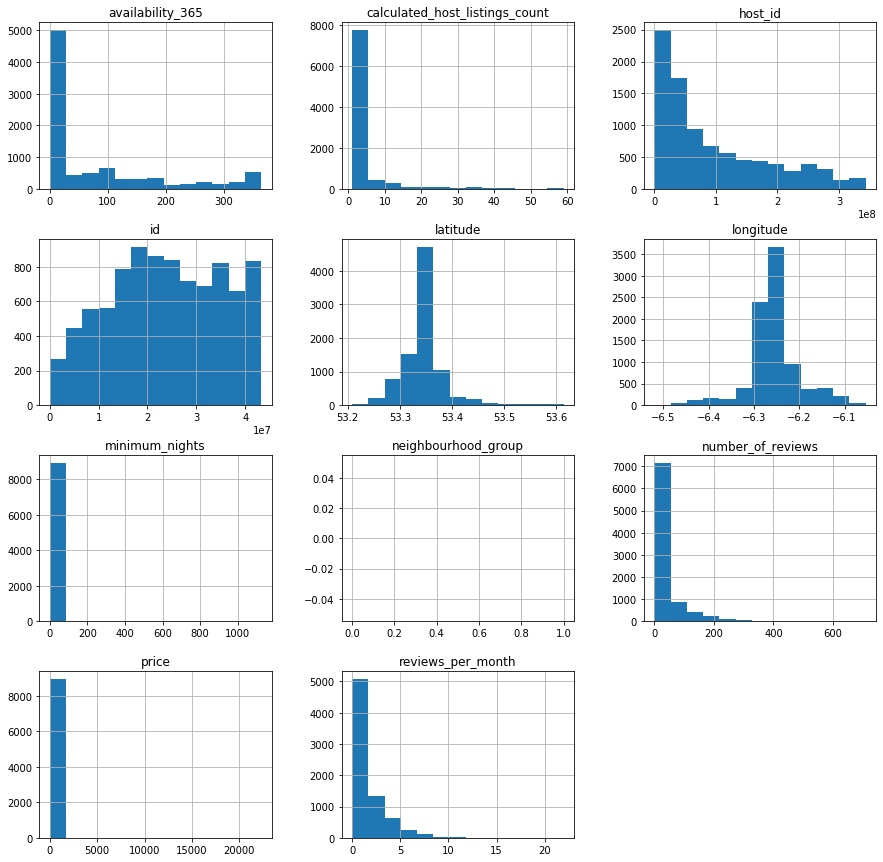

In [0]:
# plotar o histograma das variáveis numéricas
df.hist(bins=13, figsize=(15, 15));

### **Qual a média dos preços de aluguel?**

In [0]:
media = round(df['price'].mean(), 2)
print(f'Média do preço do aluguel: ${media}')

Média do preço do aluguel: $137.97


### **Verificando *outliers***

In [0]:
# Resumo estatístico para cada variável numérica
round(df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe(), 2)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,8961.00,8961.00,8961.00,7468.00,8961.00,8961.00
mean,137.97,4.49,36.54,1.55,3.88,77.91
std,349.02,21.87,65.21,1.86,7.74,111.83
min,0.00,1.00,0.00,0.01,1.00,0.00
25%,55.00,1.00,1.00,0.24,1.00,0.00
50%,89.00,2.00,9.00,0.82,1.00,2.00
75%,150.00,3.00,40.00,2.22,3.00,121.00
max,22337.00,1125.00,710.00,21.95,59.00,365.00


### Avaliações:
> - Coluna price: 75% dos valores dos imoveis estão abaixo de 150,00, mas o valor máximo está em 22.337,00. 
> - Coluna minimum_nights: Valor máximo de noites 1125 com a média de 4.5 de noites?
> - Coluna dos anfitriões: 75% dos anfitriões possuem 3 imóveis, o anfitrião que tem mais imóveis possui 59.

#### Verificando a coluna minimum_nights 

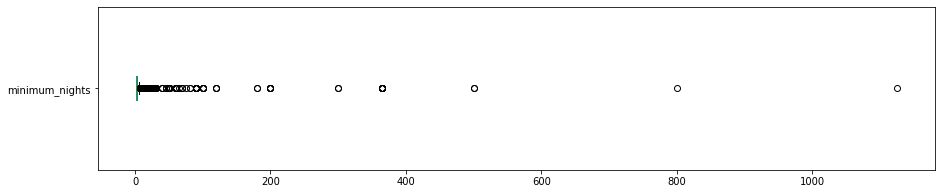

Valores acima de 30 noites: 
78  entradas
0.87 %


In [0]:
df.minimum_nights.plot(kind='box', vert=False,figsize=(15, 3))
plt.show()

print('Valores acima de 30 noites: ')
print(f'{len(df[df.minimum_nights > 30])}  entradas')
m = round(len(df[df.minimum_nights > 30]) / df.shape[0] * 100, 3)
print(f'{m} %')

In [0]:
(df.minimum_nights > 45).sum()

69

#### Verificando a coluna price 

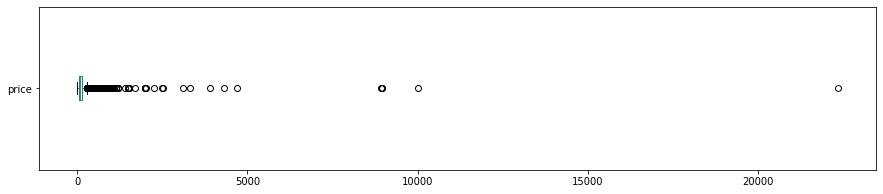

Valores acima de $450,00
341 valores
3.81 %


In [0]:
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

print('Valores acima de $450,00')
print(f'{len(df[df.price > 450])} valores')
p = round(len(df[df.price > 450]) / df.shape[0] * 100 , 2)
print(f'{p} %')

In [0]:
(df.price > 500).sum()

190

### **Removendo os Outliers**

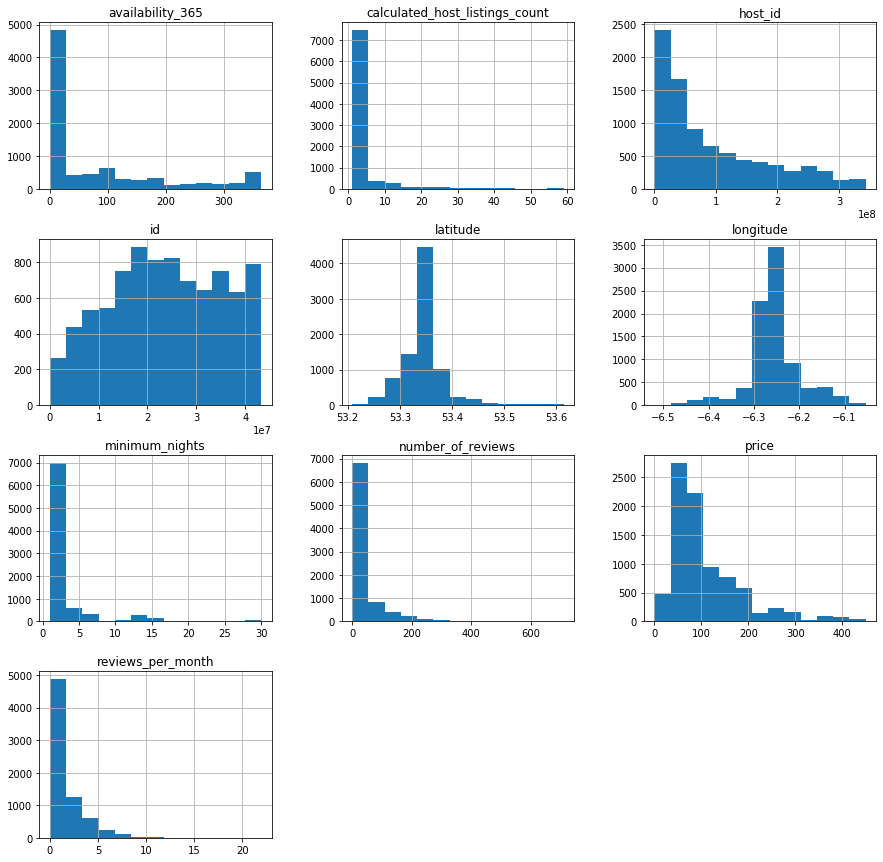

In [0]:
# remover os *outliers* em um novo DataFrame
df1 = df.copy()
df1.drop(df1[df1.price > 450].index, axis=0, inplace=True)
df1.drop(df1[df1.minimum_nights > 30].index, axis=0, inplace=True)

# remover coluna vazia`neighbourhood_group`
df1.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as novas variáveis numéricas
df1.hist(bins=13, figsize=(15, 15));

### Comparando Antes e depois de remover os outliers

In [0]:
# Dataset original.
round(df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe(), 2)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,8961.00,8961.00,8961.00,7468.00,8961.00,8961.00
mean,137.97,4.49,36.54,1.55,3.88,77.91
std,349.02,21.87,65.21,1.86,7.74,111.83
min,0.00,1.00,0.00,0.01,1.00,0.00
25%,55.00,1.00,1.00,0.24,1.00,0.00
50%,89.00,2.00,9.00,0.82,1.00,2.00
75%,150.00,3.00,40.00,2.22,3.00,121.00
max,22337.00,1125.00,710.00,21.95,59.00,365.00


In [0]:
# Dataset alterado.
round(df1[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe(), 2)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,8552.00,8552.00,8552.00,7158.00,8552.00,8552.00
mean,107.38,3.21,37.03,1.55,3.66,75.84
std,76.69,4.18,66.06,1.86,7.11,110.35
min,0.00,1.00,0.00,0.01,1.00,0.00
25%,55.00,1.00,1.00,0.24,1.00,0.00
50%,85.00,2.00,9.00,0.82,1.00,1.00
75%,138.00,3.00,40.00,2.22,3.00,115.00
max,450.00,30.00,710.00,21.95,59.00,365.00


### **Qual é a correlação existente entre as variáveis?**

In [0]:
# Criar uma matriz de correlação:
corr = df1[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()
# Visualizar a matriz de correlação.
corr

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.069289,-0.065054,-0.068004,0.101560,0.090322
minimum_nights,0.069289,1.000000,-0.051789,-0.071340,0.113751,0.074063
number_of_reviews,-0.065054,-0.051789,1.000000,0.782434,-0.023144,0.177410
reviews_per_month,-0.068004,-0.071340,0.782434,1.000000,0.041357,0.189894
calculated_host_listings_count,0.101560,0.113751,-0.023144,0.041357,1.000000,0.183324
availability_365,0.090322,0.074063,0.177410,0.189894,0.183324,1.000000


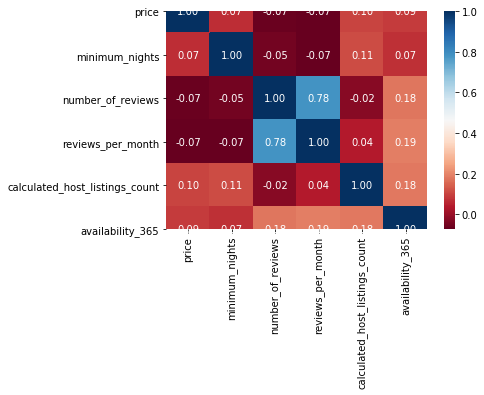

In [0]:
# Plotar um heatmap a partir das correlações com a biblioteca seaborn.
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='Black', annot=True)

### **Qual o tipo de imóvel mais alugado em Dublin pelo Airbnb?**


In [0]:
# Visualizar a quantidade de cada bairro.
df1.neighbourhood.value_counts()

Dublin City              6517
Dn Laoghaire-Rathdown     937
Fingal                    765
South Dublin              333
Name: neighbourhood, dtype: int64

In [0]:
# Visualizar a porcentagem da quantidade de imóveis disponíveis por bairro.
round(df1.neighbourhood.value_counts() / df1.shape[0] * 100, 2)

Dublin City              76.20
Dn Laoghaire-Rathdown    10.96
Fingal                    8.95
South Dublin              3.89
Name: neighbourhood, dtype: float64

In [0]:
# Visualizar a quantidade de cada tipo de imóvel.
df1.room_type.value_counts()

Private room       4195
Entire home/apt    4143
Shared room         144
Hotel room           70
Name: room_type, dtype: int64

In [0]:
# Visualizar a porcentagem do tipo de imóvel disponível.
round(df1.room_type.value_counts() / df1.shape[0] * 100, 2)

Private room       49.05
Entire home/apt    48.44
Shared room         1.68
Hotel room          0.82
Name: room_type, dtype: float64

### **Bairro mais caro de Dublin**



In [0]:
# Visualizar média de preços por bairros.
round(df1.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10], 2)

neighbourhood
Dublin City              111.98
Dn Laoghaire-Rathdown    106.31
Fingal                    83.94
South Dublin              74.19
Name: price, dtype: float64

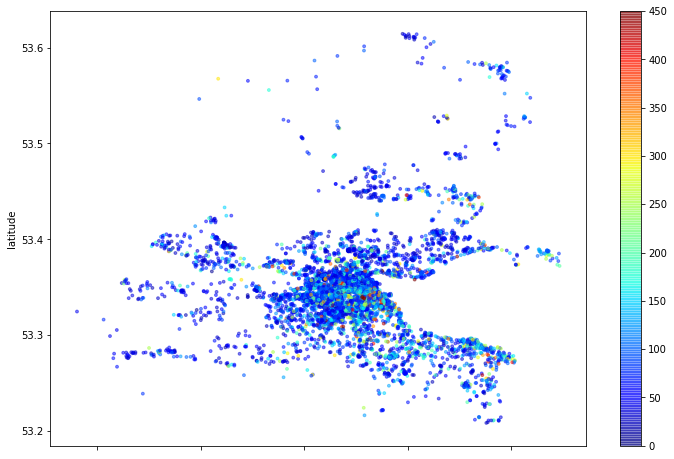

In [0]:
# plotar os imóveis pela latitude-longitude.
df1.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5, c=df1['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12, 8))

### **Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [0]:
# ver a média da coluna `minimum_nights`.
media_noite = round(df1.minimum_nights.mean(), 2)
print(f'Média de noites para aluguel = {media_noite}')

Média de noites para aluguel = 3.21


## Conclusões

* Após uma análise superficial nos dados do Airbnb da cidade de Dublin, foi possível notar alguns outliers significativos de algumas variáveis que podem "mascarar" algumas conclusões com bases estatísticas. A média do preço estava quase no valor de 140,00 antes de tratar os dados e após tratá-los a média caiu para o valor de aproximadamente 110,00, por exemplo. 
* Mais de 75% dos alugueis disponíveis estão no bairro de Dublin City.
* A preferência do tipo de aluguel são de quartos privados(49.05%) e por casa/apartamento inteiros(48.44%).
> Esse dataset é apenas uma versão resumida, o ideal para uma análise exploratória e mais robusta seria usar a base de dados mais completa, com 106 atributos disponíveis para análise.